## This Notebook Investigates Progressive Neurological Disability in a Mouse Model of Multiple Sclerosis
  written by Roberta Carluccio on 10/09/2024

In [3]:
#==========================================================================
# import libraries & check your python version
#==========================================================================
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
from functions import LatencyperGeno, filtervalues

In [4]:
#==========================================================================
# Initial parameters for post-processing analysis
#==========================================================================
# Specify the directory in which you want to visualize the models
outputPath        = os.path.join(os.path.abspath("."),"/Users/Roberta/Documents/MachineLearningExcersises/figures")

# Base directory
main_directory     = ('/Users/Roberta/Documents/MachineLearningExcersises/micedata/initial/')
file_name          = ('PhenotypeData.xlsx')


# Get to the base directory
os.chdir(main_directory)
cur_dir           = os.getcwd()
print ('Current directory: ',cur_dir)
plt.figure().clf()

print ('-----------------------------')
print ('Start sampling the data:')

Current directory:  /Users/Roberta/Documents/MachineLearningExcersises/micedata/initial
-----------------------------
Start sampling the data:


<Figure size 640x480 with 0 Axes>

In [5]:
#==========================================================================
# Read all data sheets - Data Collection
#==========================================================================
xls = pd.ExcelFile(main_directory+file_name)
df6 = pd.read_excel(xls, 'Rotarod Transposed') # extract data sheet. The file name has to be the same as on Excel
new_header = df6.iloc[0]                       # grab the first row for the header
df6 = df6[1:]                                  # take the data less the header row
df6.columns = new_header                       # set the header row as the df header

In [6]:
# Visualise initial dataset
df6.head()

,Mouse ID,DOB,Age (weeks),Sex,Genotype,14.0,14.33,14.66,15.0,15.33,...,31.0,31.33,31.66,32.0,32.33,32.66,33.0,33.33,33.66,34.0
1,#57,2019-11-26 00:00:00,-6256.428571,Female,CpKO,144.0,154.0,173.0,123.0,120.0,...,107.0,138.0,145.0,121.0,119.0,110.0,141.0,92.0,92.0,97.0
2,#58,2019-11-26 00:00:00,-6256.428571,Male,CpKO x G37R,78.0,110.0,98.0,105.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#59,2019-11-26 00:00:00,-6256.428571,Male,CpKO,92.0,131.0,86.0,135.0,132.0,...,102.0,120.0,129.0,103.0,113.0,133.0,133.0,103.0,100.0,114.0
4,#60,2019-11-26 00:00:00,-6256.428571,Male,CpKO,121.0,82.0,156.0,136.0,128.0,...,130.0,122.0,108.0,114.0,124.0,126.0,90.0,140.0,123.0,135.0
5,#61,2019-11-26 00:00:00,-6256.428571,Male,Non-Tg,144.0,180.0,180.0,180.0,180.0,...,175.0,178.0,180.0,154.0,172.0,171.0,165.0,180.0,159.0,154.0


In [7]:
#==========================================================================
# Data Cleaning
#==========================================================================
# keep only the data that have values in DoB column
#print ("check my initial data frame null values", df6['DOB'].isnull()) # have a look at the data, check again after applying the filter
df = df6[df6['DOB'].notna()] # this retrieves only non nan rows in DoB

# Drop unnecessary columns
df       = df.drop(labels=["Mouse ID", "DOB", "Age (weeks)"], axis=1)

#==========================================================================
# Data Cleaning -  One Hot Encoding
#==========================================================================
# create new variables
mice_variables = ['Sex','Genotype']

# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df       = pd.get_dummies(data   = df,
                         prefix  = mice_variables,
                         columns = mice_variables)

In [8]:
#==========================================================================
# Data Analysis - Data manipulation
#==========================================================================
# Get plotting variables
weeks                       =  df.iloc[0,:-6].index  # this is the time in (weeks) when the exercise score was calculated
exercise_score              =  df.iloc[:,:-6]        # take only the part of the table referring to the excersice score data
filter_vals                 =  [0]                   # this value means mouse has died
ageofdeath                  =  filtervalues (filter_vals, exercise_score)
ageofdeath_edit             =  ageofdeath.fillna(44) # give high value to mice still alive at the end of the experiment
df.loc[:, ('Age of Death')] =  ageofdeath_edit       # this adds the new column to the dataset

In [9]:
# Visualise Cleaned Dataset
df.head()

,14.0,14.33,14.66,15.0,15.33,15.66,16.0,16.33,16.66,17.0,...,33.33,33.66,34.0,Sex_Female,Sex_Male,Genotype_CpKO,Genotype_CpKO x G37R,Genotype_G37R,Genotype_Non-Tg,Age of Death
1,144.0,154.0,173.0,123.0,120.0,152.0,132.0,155.0,152.0,115.0,...,92.0,92.0,97.0,True,False,True,False,False,False,44.0
2,78.0,110.0,98.0,105.0,132.0,138.0,139.0,125.0,110.0,126.0,...,0.0,0.0,0.0,False,True,False,True,False,False,28.0
3,92.0,131.0,86.0,135.0,132.0,138.0,161.0,138.0,127.0,179.0,...,103.0,100.0,114.0,False,True,True,False,False,False,44.0
4,121.0,82.0,156.0,136.0,128.0,130.0,112.0,147.0,148.0,158.0,...,140.0,123.0,135.0,False,True,True,False,False,False,44.0
5,144.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,...,180.0,159.0,154.0,False,True,False,False,False,True,44.0


In [6]:
#==========================================================================
# Extract Data for plotting per genotype
#==========================================================================
Tot_std, Tot_col_exercise_score, Tot_z_score, Tot_SE                           = LatencyperGeno(df,exercise_score,'All', 'None')
Cpko_std, Cpko_col_exercise_score, Cpko_z_score,Cpko_SE                        = LatencyperGeno(df,exercise_score,'Genotype_CpKO', 'None')
CpKOxG37R_std, CpKOxG37R_col_exercise_score,CpKOxG37R_z_score, CpKOxG37R_SE    = LatencyperGeno(df,exercise_score,'Genotype_CpKO x G37R', 'None')
G37R_std, G37R_col_exercise_score, G37R_z_score, G37R_SE                       = LatencyperGeno(df,exercise_score,'Genotype_G37R', 'None')
Non_Tg_std, Non_Tg_col_exercise_score, Non_Tg_z_score, Non_Tg_SE               = LatencyperGeno(df,exercise_score,'Genotype_Non-Tg', 'None')

In [7]:
#==========================================================================
# Extract Data for plotting per sex and genotype
#========================================================================== 
Cpko_std_F, Cpko_col_exercise_scoreF, Cpko_z_score_F, Cpko_SE_F = LatencyperGeno(df,exercise_score,'Genotype_CpKO','Sex_Female')
Cpko_std_M, Cpko_col_exercise_scoreM, Cpko_z_score_M, Cpko_SE_M = LatencyperGeno(df,exercise_score,'Genotype_CpKO','Sex_Male')

CpKOxG37R_std_F, CpKOxG37R_col_exercise_scoreF, CpKOxG37R_z_score_F, CpKOxG37R_SE_F = LatencyperGeno(df,exercise_score,'Genotype_CpKO x G37R','Sex_Female')
CpKOxG37R_std_M, CpKOxG37R_col_exercise_scoreM, CpKOxG37R_z_score_M, CpKOxG37R_SE_M = LatencyperGeno(df,exercise_score,'Genotype_CpKO x G37R','Sex_Male')

G37R_std_F, G37R_col_exercise_scoreF, G37R_z_score_F, G37R_SE_F = LatencyperGeno(df,exercise_score,'Genotype_G37R','Sex_Female')
G37R_std_M, G37R_col_exercise_scoreM, G37R_z_score_M, G37R_SE_M = LatencyperGeno(df,exercise_score, 'Genotype_G37R','Sex_Male')

Non_Tg_std_F, Non_Tg_col_exercise_scoreF, Non_Tg_z_score_F, Non_Tg_SE_F = LatencyperGeno(df, exercise_score,'Genotype_Non-Tg','Sex_Female')
Non_Tg_std_M, Non_Tg_col_exercise_scoreM, Non_Tg_z_score_M, Non_Tg_SE_M = LatencyperGeno(df,exercise_score,'Genotype_Non-Tg','Sex_Male')

# Plot latency to fail values for different genoype and sex, or combined

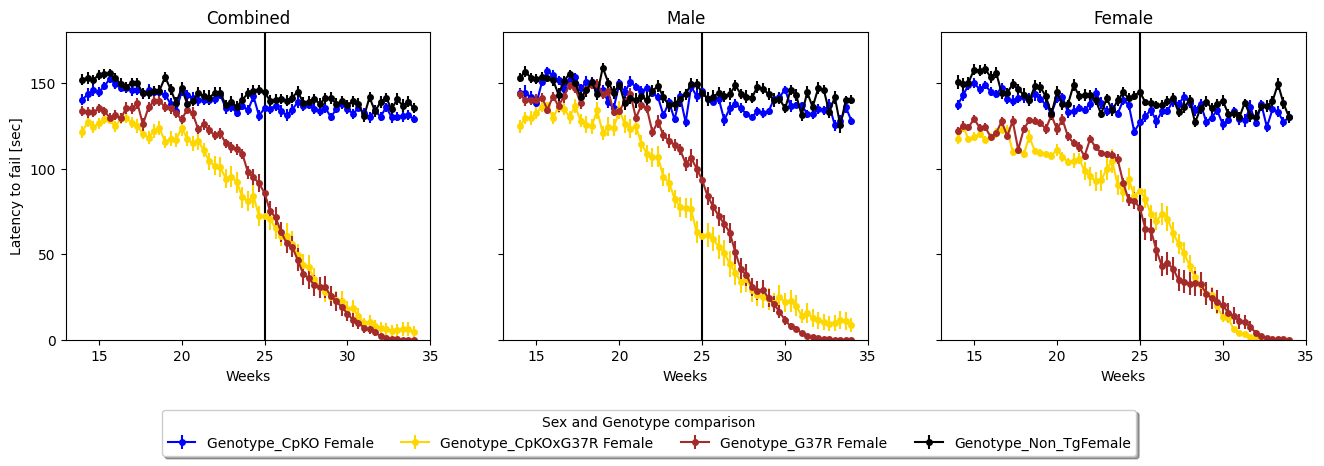

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=True, sharey=True, tight_layout=True)

# First subplot
axs[0].errorbar(weeks, Cpko_col_exercise_score, yerr=np.abs(Cpko_SE),  fmt='-o', color = 'b',ms=2, mew=3, label = 'Genotype_CpKO')
axs[0].errorbar(weeks, CpKOxG37R_col_exercise_score , yerr=np.abs(CpKOxG37R_SE),  fmt='-o',color = 'gold',  ms=2, mew=3,label = 'Genotype_CpKOxG37R')
axs[0].errorbar(weeks, G37R_col_exercise_score, yerr=np.abs(G37R_SE),  fmt='-o',color = 'brown', ms=2, mew=3,label = 'Genotype_G37R')
axs[0].errorbar(weeks, Non_Tg_col_exercise_score , yerr=np.abs(Non_Tg_SE),  fmt='-o',color = 'k', ms=2, mew=3,label = 'Genotype_Non_Tg')
axs[0].axvline(x = 25, color = 'k')
axs[0].set_title('Combined')

# Second subplot
axs[2].errorbar(weeks, Cpko_col_exercise_scoreF,  yerr=np.abs(Cpko_SE_F),  fmt='-o', color = 'b',  ms=2, mew=3, label = 'Genotype_CpKO Female')
axs[2].errorbar(weeks, CpKOxG37R_col_exercise_scoreF ,  yerr=np.abs(CpKOxG37R_SE_F),  fmt='-o', color = 'gold',  ms=2, mew=3, label = 'Genotype_CpKOxG37R Female')
axs[2].errorbar(weeks, G37R_col_exercise_scoreF,  yerr=np.abs(G37R_SE_F),  fmt='-o', color = 'brown',  ms=2, mew=3, label = 'Genotype_G37R Female')
axs[2].errorbar(weeks, Non_Tg_col_exercise_scoreF ,  yerr=np.abs(Non_Tg_SE_F),  fmt='-o', color = 'k',  ms=2, mew=3, label = 'Genotype_Non_TgFemale')
axs[2].set_title('Female')
axs[2].axvline(x = 25, color = 'k')

# Third subplot
axs[1].errorbar(weeks, Cpko_col_exercise_scoreM,  yerr=np.abs(Cpko_SE_M),  fmt='-o', color = 'b',ms=2, mew=3, label = 'Genotype_CpKO Male')
axs[1].errorbar(weeks, CpKOxG37R_col_exercise_scoreM ,  yerr=np.abs(CpKOxG37R_SE_M),  fmt='-o', color = 'gold', ms=2, mew=3,label = 'Genotype_CpKOxG37R Male')
axs[1].errorbar(weeks, G37R_col_exercise_scoreM,  yerr=np.abs(G37R_SE_M),  fmt='-o', color = 'brown',  ms=2, mew=3, label = 'Genotype_G37R Male')
axs[1].errorbar(weeks, Non_Tg_col_exercise_scoreM ,  yerr=np.abs(Non_Tg_SE_M),  fmt='-o', color = 'k', ms=2, mew=3, label = 'Genotype_Non_TgMale')  
axs[1].set_title('Male')
axs[1].axvline(x = 25, color = 'k')

# Plot features
axs[1].set_xlabel('Weeks')
axs[0].set_xlabel('Weeks')
axs[2].set_xlabel('Weeks')
axs[0].set_ylabel('Latency to fail [sec]')
axs[0].set_xticks([15,20,25,30,35])
axs[1].set_xticks([15,20,25,30,35])
axs[2].set_xticks([15,20,25,30,35])
axs[0].set_yticks([0,50,100,150])
axs[1].set_yticks([0,50,100,150])
axs[2].set_yticks([0,50,100,150])
axs[2].set_ylim([0,180])
plt.legend(title="Sex and Genotype comparison",  ncol=4, loc= 'lower center',  bbox_to_anchor=(-0.8, -0.4), fancybox=True, shadow=True)
plt.savefig(outputPath+"LatencyscoreComp3.pdf",transparent=True, bbox_inches='tight') 
plt.show()

# The following plots are provided for descriptive purposes and are not intended for latency analysis.

### Plot Z-scored all combined values 

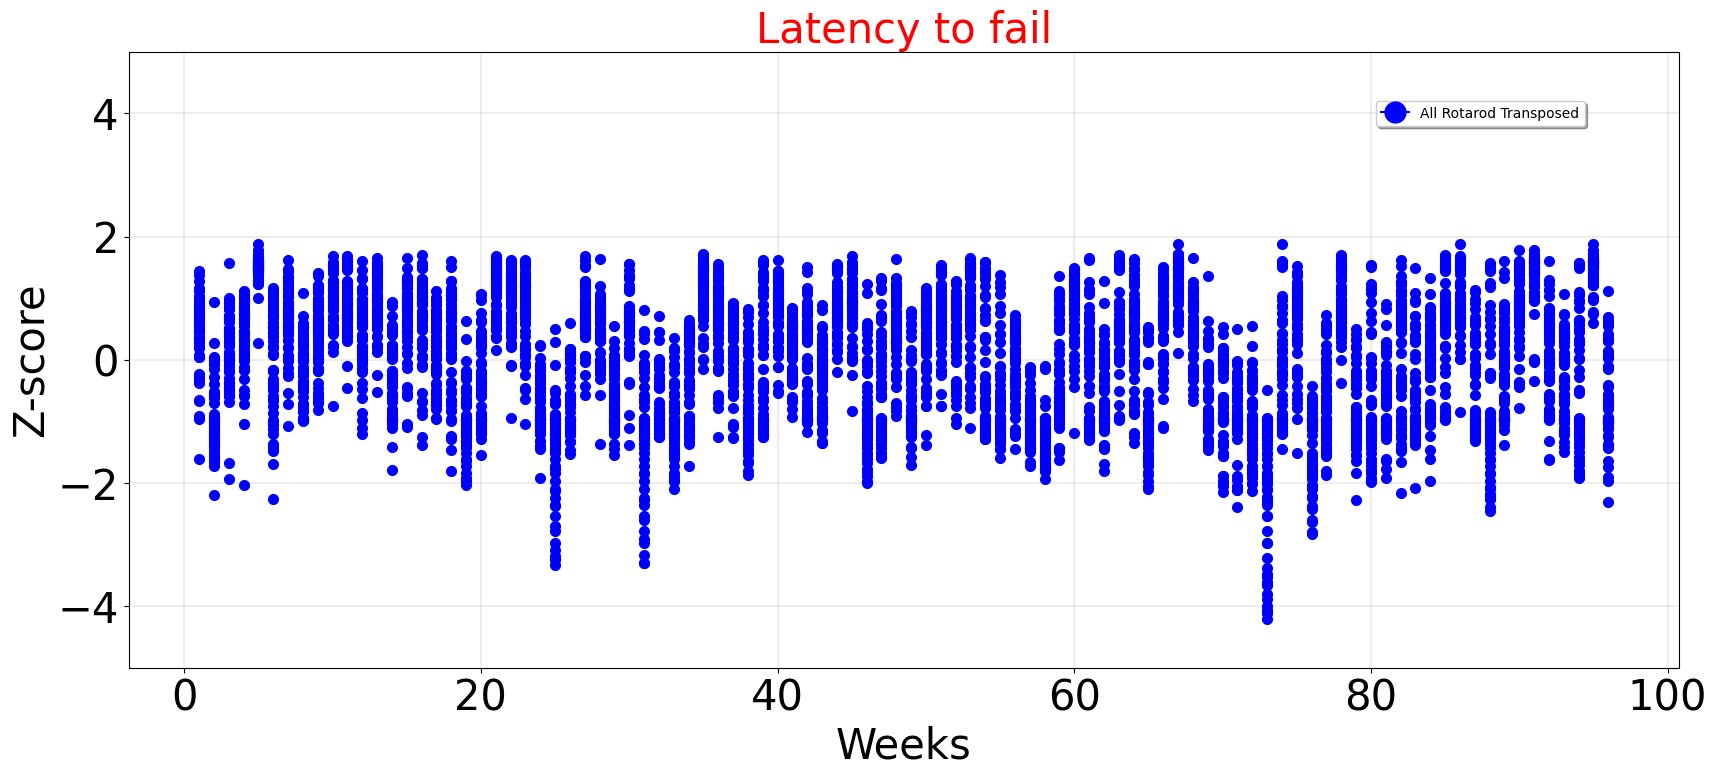

In [19]:
## Log fit finction
plt.figure(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.grid(color='black', linestyle='-', linewidth=0.1)

plt.ylim(-5.,5.)
#plt.xlim(0, 15.)
plt.xlabel('Weeks', fontsize=30)
plt.ylabel('Z-score', fontsize=30)
plt.title('Latency to fail', fontsize=30, color='red')  
#plt.xticks(np.arange(-0.0, 15.0, 2.5))
#plt.yticks(np.arange(-10, 10, 2.5))
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.plot(Tot_z_score.index, Tot_z_score.values, marker='o', ms=5, mew=3, ls="none", color='b' )

handle = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=15, label='All Rotarod Transposed')

plt.legend(handles=[handle],  ncol=2, loc='center left', bbox_to_anchor=(0.8, 0.9), fancybox=True, shadow=True)

plt.savefig(outputPath+"Zscore.pdf",transparent=True, bbox_inches='tight') 
plt.show() 

### Plot values for different genoype

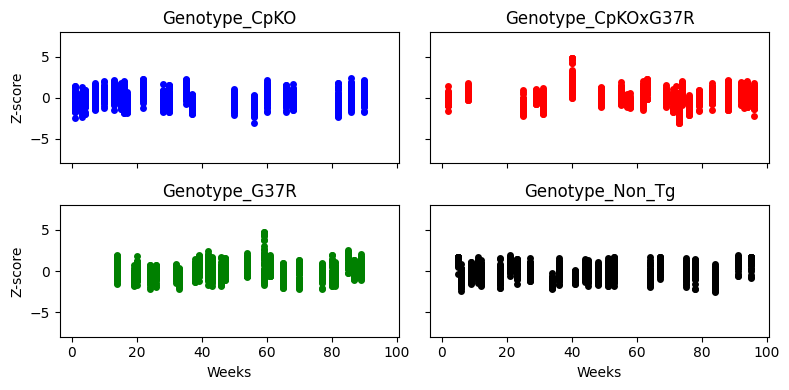

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 4), sharex=True, sharey=True, tight_layout=True)


axs[0, 0].plot( Cpko_z_score.index, Cpko_z_score.values, color = 'b', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKO')
axs[0, 0].set_title('Genotype_CpKO')

axs[0, 1].plot( CpKOxG37R_z_score.index, CpKOxG37R_z_score.values , color = 'r', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKOxG37R')
axs[0, 1].set_title('Genotype_CpKOxG37R')


axs[1, 0].plot( G37R_z_score.index, G37R_z_score.values, color = 'g', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_G37R')
axs[1, 0].set_title( 'Genotype_G37R')


axs[1, 1].plot( Non_Tg_z_score.index, Non_Tg_z_score.values, color = 'k', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_Non_Tg')
axs[1, 1].set_title('Genotype_Non_Tg')

axs[1, 1].set_xlabel('Weeks')
axs[1, 0].set_xlabel('Weeks')
axs[0, 0].set_ylabel('Z-score')
axs[1, 0].set_ylabel('Z-score')

plt.ylim(-8.,8.)
plt.savefig(outputPath+"latencyscoreComp.pdf",transparent=True, bbox_inches='tight') 
plt.show()

### Plot values for different genoypes

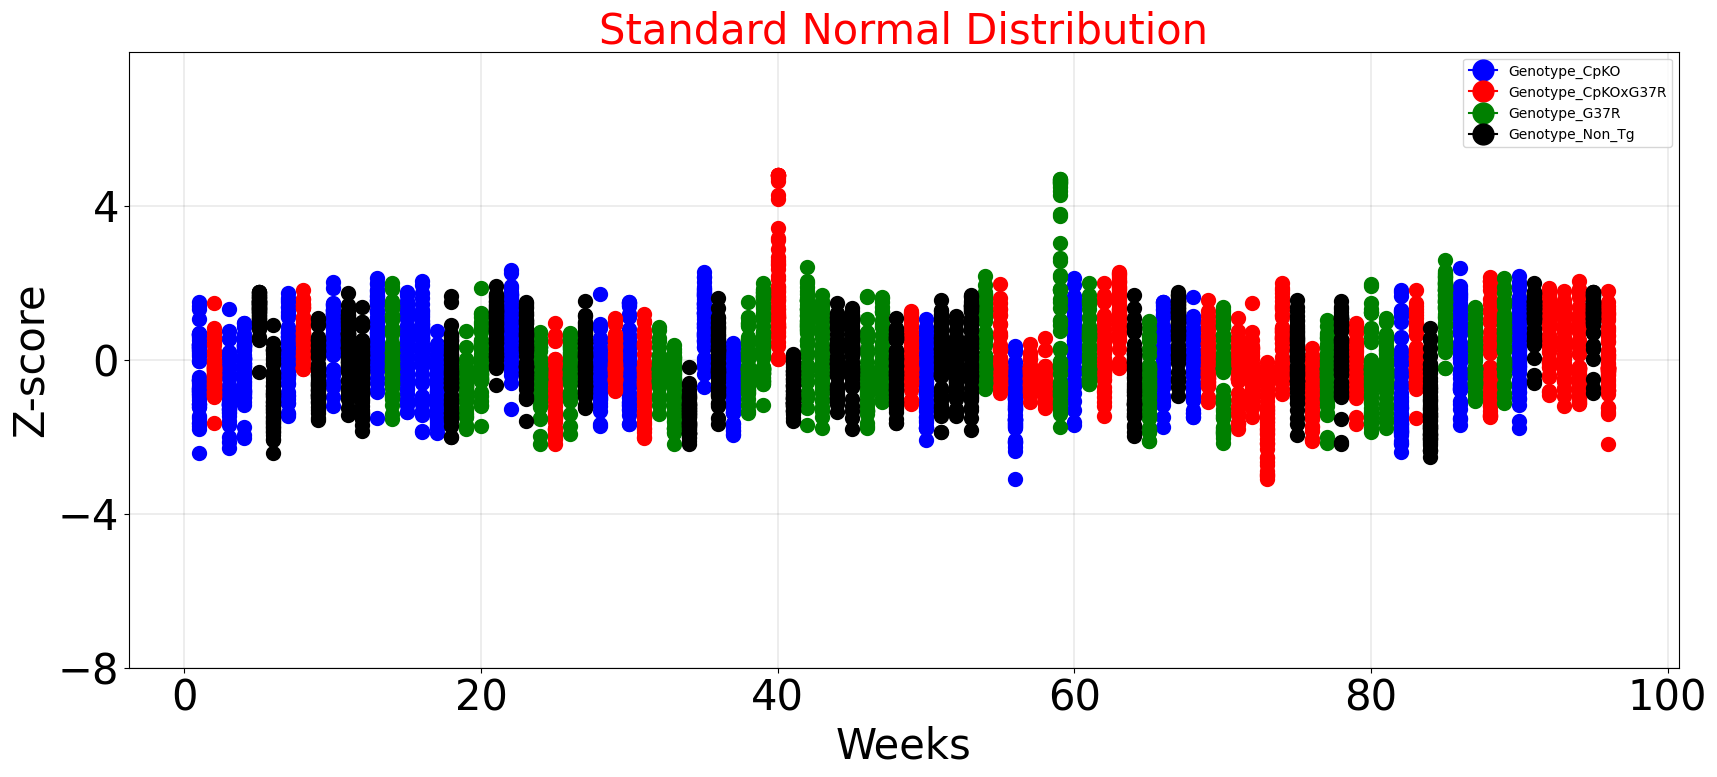

In [13]:
## Log fit finction
plt.figure(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.grid(color='black', linestyle='-', linewidth=0.1)

#plt.ylim(-10.,10.)
#plt.xlim(0, 15.)
plt.xlabel('Weeks', fontsize=30)
plt.ylabel('Z-score', fontsize=30)
plt.title('Standard Normal Distribution', fontsize=30, color='red')  
#plt.xticks(np.arange(-0.0, 15.0, 2.5))
#plt.yticks(np.arange(-10, 10, 2.5))
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)

plt.plot(Cpko_z_score.index, Cpko_z_score.values, color = 'b', marker='o', ms=8, mew=3,ls="none", label = 'Genotype_CpKO')



plt.plot(CpKOxG37R_z_score.index, CpKOxG37R_z_score.values, color = 'r', marker='o', ms=8, mew=3,ls="none", label = 'Genotype_CpKOxG37R')



plt.plot(G37R_z_score.index, G37R_z_score.values, color = 'g', marker='o', ms=8, mew=3,ls="none", label = 'Genotype_G37R')



plt.plot( Non_Tg_z_score.index, Non_Tg_z_score.values, color = 'k', marker='o', ms=8, mew=3,ls="none", label = 'Genotype_Non_Tg')
#plt.legend(title="All Rodente Retardos",  ncol=2, loc='center left', bbox_to_anchor=(0.88, 0.7), fancybox=True, shadow=True)
plt.ylim(-8.,8.)
plt.yticks(np.arange(-8, 8, 4))

handle1 = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=15, label='Genotype_CpKO')
handle2 = mlines.Line2D([], [], color='red', marker='o',
                          markersize=15, label='Genotype_CpKOxG37R')
handle3 = mlines.Line2D([], [], color='green', marker='o',
                          markersize=15, label='Genotype_G37R')
handle4 = mlines.Line2D([], [], color='black', marker='o',
                          markersize=15, label='Genotype_Non_Tg')

plt.legend(handles=[handle1,handle2,handle3,handle4])
plt.savefig(outputPath+"zscorecombined.pdf",transparent=True, bbox_inches='tight') 
plt.show() 

### Plot standard deviation values for different genoype and sex

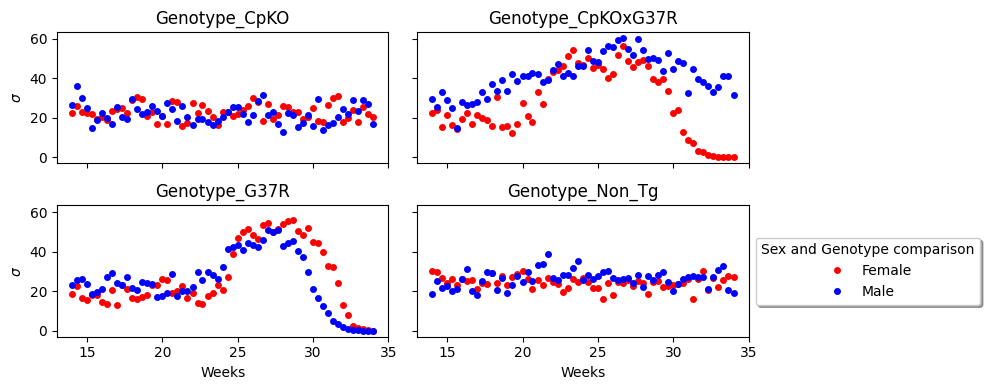

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 4), sharex=True, sharey=True, tight_layout=True)


axs[0, 0].plot(weeks, Cpko_std_F, color = 'r', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKO Female')
axs[0, 0].plot(weeks, Cpko_std_M, color = 'b', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKO Male')
axs[0, 0].set_title('Genotype_CpKO')


axs[0, 1].plot(weeks, CpKOxG37R_std_F , color = 'r', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKOxG37R Female')
axs[0, 1].plot(weeks, CpKOxG37R_std_M , color = 'b', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_CpKOxG37R Male')

axs[0, 1].set_title('Genotype_CpKOxG37R')


axs[1, 0].plot(weeks, G37R_std_F, color = 'r', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_G37R Female')
axs[1, 0].plot(weeks, G37R_std_M, color = 'b', marker='o', ms=2, mew=3,ls="none", label = 'Genotype_G37R Male')
axs[1, 0].set_title( 'Genotype_G37R')


axs[1, 1].plot(weeks, Non_Tg_std_F , color = 'r', marker='o', ms=2, mew=3,ls="none", label = 'Female')
axs[1, 1].plot(weeks, Non_Tg_std_M , color = 'b', marker='o', ms=2, mew=3,ls="none", label = 'Male')
axs[1, 1].set_title('Genotype_Non_Tg')

axs[1, 1].set_xlabel('Weeks')
axs[1, 0].set_xlabel('Weeks')
axs[0, 0].set_ylabel('$\sigma$')
axs[1, 0].set_ylabel('$\sigma$')
plt.legend(title="Sex and Genotype comparison",  ncol=1, loc='center left', bbox_to_anchor=(1, 0.5),  fancybox=True, shadow=True)
plt.savefig(outputPath+"latencyscoreComp.pdf",transparent=True, bbox_inches='tight') 
plt.show()

### Plot values for different genoype and sex, or combined

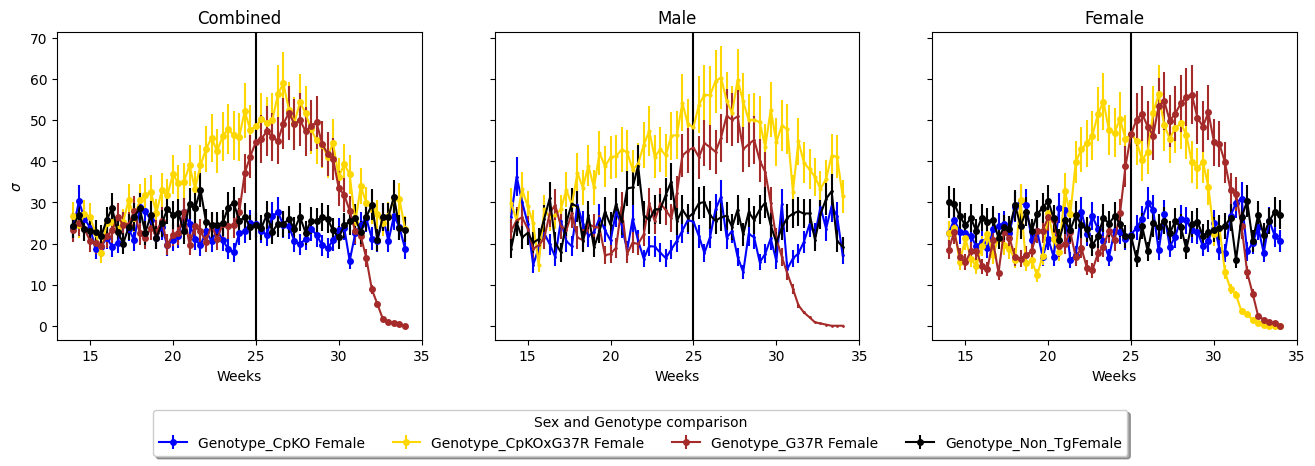

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharex=True, sharey=True, tight_layout=True)

axs[0].errorbar(weeks, Cpko_std, yerr=np.abs(Cpko_SE),  fmt='-o', color = 'b',ms=2, mew=3, label = 'Genotype_CpKO')
axs[0].errorbar(weeks, CpKOxG37R_std, yerr=np.abs(CpKOxG37R_SE),  fmt='-o',color = 'gold',  ms=2, mew=3,label = 'Genotype_CpKOxG37R')
axs[0].errorbar(weeks, G37R_std, yerr=np.abs(G37R_SE),  fmt='-o',color = 'brown', ms=2, mew=3,label = 'Genotype_G37R')
axs[0].errorbar(weeks, Non_Tg_std, yerr=np.abs(Non_Tg_SE),  fmt='-o',color = 'k', ms=2, mew=3,label = 'Genotype_Non_Tg')
axs[0].axvline(x = 25, color = 'k')
axs[0].set_title('Combined')

axs[2].errorbar(weeks, Cpko_std_F,  yerr=np.abs(Cpko_SE_F),  fmt='-o', color = 'b',  ms=2, mew=3, label = 'Genotype_CpKO Female')
axs[2].errorbar(weeks, CpKOxG37R_std_F ,  yerr=np.abs(CpKOxG37R_SE_F),  fmt='-o', color = 'gold',  ms=2, mew=3, label = 'Genotype_CpKOxG37R Female')
axs[2].errorbar(weeks, G37R_std_F,  yerr=np.abs(G37R_SE_F),  fmt='-o', color = 'brown',  ms=2, mew=3, label = 'Genotype_G37R Female')
axs[2].errorbar(weeks, Non_Tg_std_F,  yerr=np.abs(Non_Tg_SE_F),  fmt='-o', color = 'k',  ms=2, mew=3, label = 'Genotype_Non_TgFemale')
axs[2].axvline(x = 25, color = 'k')
axs[2].set_title('Female')

axs[1].errorbar(weeks,  Cpko_std_M,  yerr=np.abs(Cpko_SE_M),  fmt='-o', color = 'b',ms=1, mew=1, label = 'Genotype_CpKO Male')
axs[1].errorbar(weeks, CpKOxG37R_std_M,  yerr=np.abs(CpKOxG37R_SE_M),  fmt='-o', color = 'gold', ms=2, mew=1,label = 'Genotype_CpKOxG37R Male')
axs[1].errorbar(weeks, G37R_std_M,  yerr=np.abs(G37R_SE_M),  fmt='-o', color = 'brown',  ms=1, mew=1, label = 'Genotype_G37R Male')
axs[1].errorbar(weeks, Non_Tg_std_M ,  yerr=np.abs(Non_Tg_SE_M),  fmt='-o', color = 'k', ms=1, mew=1, label = 'Genotype_Non_TgMale')  
axs[1].set_title('Male')
axs[1].axvline(x = 25, color = 'k')

axs[1].set_xlabel('Weeks')
axs[0].set_xlabel('Weeks')
axs[2].set_xlabel('Weeks')
axs[0].set_ylabel('$\sigma$')
#axs[0].set_xticks([15,20,25,30,35])
#axs[2].set_ylim([0,180])
plt.legend(title="Sex and Genotype comparison",  ncol=4, loc= 'lower center',  bbox_to_anchor=(-0.8, -0.4), fancybox=True, shadow=True)
plt.savefig(outputPath+"std.pdf",transparent=True, bbox_inches='tight') 
plt.show()